#    Data 620, Project 1
Team 6: Alice Friedman, Jun Pan, Stephen (Scott) Jones, and Jeff Littlejohn
June 19, 2019

## Part 1: Setup

- Install required packages (NetworkX, Matplotlib.pyplot)

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import json
from twython import Twython
import time

## Load Data

- Data is scraped from Twitter using Twython and the Twitter API

In [3]:
# Code below adapated from: https://stackabuse.com/accessing-the-twitter-api-with-python/
# Load Twitter API credentials from json file
with open("twitter_credentials.json", "r") as file:  
    creds = json.load(file)

# Instantiate an object and provide Twitter credentials
twitter = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET_KEY'], creds['ACCESS_TOKEN'], creds['ACCESS_SECRET_TOKEN'])

In [75]:
# create empty dictionary to accept data
dict_fol = {'screen_name': [], 'verified': [], 'followers_count': []}  

# we don't want to dump directly to the graph because we'll get a giant hairball
# we will want to filter for users with more followers before moving to depth=2 of the social network

In [77]:
#create loop to page through API results
next_cursor = -1

while(next_cursor):
    get_followers = twitter.get_followers_list(screen_name='mikegravel', count=1000, cursor=next_cursor)
    for user in get_followers['users']:  
        dict_fol['screen_name'].append(user['screen_name'])
        dict_fol['verified'].append(user['verified'])
        dict_fol['followers_count'].append(user['followers_count'])
        time.sleep(1)

KeyboardInterrupt: 

In [78]:
#Structure data in a pandas DataFrame for easier manipulation
df_followers = pd.DataFrame(dict_fol)
df_followers = df_followers.drop_duplicates()
df_followers.sort_values(by='followers_count', inplace=True, ascending=False)  
df_followers.head(5)
len(df_followers)


1188

In [88]:
# due to rate limits, have saved a sample of the results into a json file for later reloading
with open("mikegravel_followers.json", "w") as file:  
    json.dump(dict_fol, file)

### Get follower data on depth=2 followers using a script

Write a script to get data and dump it into JSON files.

How does this script work?

1. First, we instantiate a Twython object, which we call "twitter"--this is basically a vehicle for telling Twitter that we have credentials to access the API.

2. Next, we create an empty dictionary with the fields we are looking to connect

3. Then, we creat a loop to page through the API results and add them to our dictionary. This is really the key part of the function. 

4. Last, we dump the data into a JSON file. One reason to do it this way is so that we aren't eating up all of our memory by holding all the results in different data forms. Every time the function runs, we are overwriting the dictionary.

The whole functions is wrapped in a try-except to try and get around the API rate limits, which reset every 15 minutes. If an exception occurs because we have asked Twitter for data too many times, the function will wait 15 minutes, printing a statement every minute to let you know it's still working.

In [56]:
def get_followers_json(username):
    try:
        # Load Twitter API credentials from json file
        with open("twitter_credentials.json", "r") as file:  
            creds = json.load(file)

        # 1) Instantiate an object and provide Twitter credentials
        twitter = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET_KEY'], creds['ACCESS_TOKEN'], creds['ACCESS_SECRET_TOKEN'])# create empty dictionary to accept data
        
        # 2) Create empty dictionary
        dict_fol = {'screen_name': [], 'verified': [], 'followers_count': []}  
    
        # 3) Create loop to page through API results
        next_cursor = -1
        timeout = time.time() + 60*60 #creates a hard end time for the script to run

        while(next_cursor):
            if time.time() > timeout:
                break #ends loop after timeout period
            get_followers = twitter.get_followers_list(screen_name = username, count=1000, cursor=next_cursor)
            print("Getting %s's followers" % username)
            for user in get_followers['users']:  
                dict_fol['screen_name'].append(user['screen_name'])
                dict_fol['verified'].append(user['verified'])
                dict_fol['followers_count'].append(user['followers_count'])
            try: 
                time.sleep(75)
                next_cursor = get_followers["next_cursor"]
            except:
                break
    
        filename=username + "_followers.json"
    
        with open(filename, "w") as file:
            json.dump(dict_fol, file)
        
        print("Saving %s's followers to JSON file" % username)
    
    except:
        i = 15
        while i > 0:
            print("Waiting for API rate limit to reset. Will try again in %d minutes" % i)
            time.sleep(60) #Twitter API rate limits reset after 15 minutes
            i -= 1
        get_followers_json(username)

In [46]:
#get list of followers to try to get followers of

file = "Project1data/mikegravel_followers.json"

#open file with followers
with open(file, "r") as file:
    mg_fol_json = json.load(file)

#turn into pandas dataframe
df_followers = pd.DataFrame(mg_fol_json)
df_followers.sort_values(by='followers_count', inplace=True, ascending=False)
df_followers = df_followers[df_followers.followers_count >500]
df_followers = df_followers.drop_duplicates()

followers_to_get = df_followers['screen_name'].unique()



In [47]:
print(followers_to_get[:5])

['tankcat' 'Abigail1963' 'AdomGetachew' 'ActTogetherFL' 'thesecondgoing']


In [ ]:
#run through list of followers to get followers of
for follower in followers_to_get:
    get_followers_json(follower)

Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's followers
Getting tankcat's fo

Getting zacharyWelliott's followers
Getting zacharyWelliott's followers
Getting zacharyWelliott's followers
Getting zacharyWelliott's followers
Getting zacharyWelliott's followers
Getting zacharyWelliott's followers
Getting zacharyWelliott's followers
Getting zacharyWelliott's followers
Getting zacharyWelliott's followers
Getting zacharyWelliott's followers
Getting zacharyWelliott's followers
Getting zacharyWelliott's followers
Getting zacharyWelliott's followers
Getting zacharyWelliott's followers
Getting zacharyWelliott's followers
Getting zacharyWelliott's followers
Getting zacharyWelliott's followers
Getting zacharyWelliott's followers
Getting zacharyWelliott's followers
Getting zacharyWelliott's followers
Getting zacharyWelliott's followers
Getting zacharyWelliott's followers
Getting zacharyWelliott's followers
Getting zacharyWelliott's followers
Getting zacharyWelliott's followers
Getting zacharyWelliott's followers
Getting zacharyWelliott's followers
Getting zacharyWelliott's fo

## Data Exploration

If we take a look at what the get_followers_list method does, we can see that it returns a dictionary with information about the users who follow the specified Twitter account. Information is tied to the tweet, and includes the text of the last tweet.

In [91]:
result = twitter.get_followers_list(screen_name='mikegravel', count=2)
print(result)

{'users': [{'id': 825086136741675009, 'id_str': '825086136741675009', 'name': 'Liz Rodgers', 'screen_name': 'mslizclementine', 'location': '', 'description': 'Momma, business owner, passport holder.', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 5, 'friends_count': 127, 'listed_count': 0, 'created_at': 'Fri Jan 27 21:00:39 +0000 2017', 'favourites_count': 525, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 93, 'lang': None, 'status': {'created_at': 'Sat Jun 15 03:04:47 +0000 2019', 'id': 1139730442150539264, 'id_str': '1139730442150539264', 'text': 'RT @SarahKSilverman: OTHER POLICE OFFICERS NEED TO SPEAK OUT AGAINST THIS. THIS DOES NOT HAPPEM TO WHITE PEOPLE WHEN THEIR 4 yo TAKES A BAR…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'SarahKSilverman', 'name': 'Sarah Silverman', 'id': 30364057, 'id_str': '30364057', 'indices': [3, 19]

In [127]:
df = df_followers.drop_duplicates()
df.head(25)

,screen_name,verified,followers_count
1084,tankcat,True,5183
474,tankcat,True,5182
638,Abigail1963,False,4272
964,AdomGetachew,False,2654
848,ActTogetherFL,False,2381
438,ActTogetherFL,False,2380
478,thesecondgoing,False,2013
1121,zacharyWelliott,False,1697
48,kateah,False,1625
518,tucsonmike,False,1577


The reason why some of these are dupicates is because the Twitter API pulls each tweet--in the time it takes to pull the next batch of Tweets, some of the users have had a change in follower count.

We can now use the get_followers_json function to get followers for the top MikeGravel followers

## Create Graph

To create a social network graph of users with a directed "follow" relationship to official campaign Twitter of Mike Gravel

- Add "ego" to graph by locating Twitter user Mike Gravel
- Add edges based on users who follow @mikegravel
    - Include as metadata verified status, or other categorical data
- Create list of Twitter users for depth=1
- Add depth=2 edges of users who follow users identified in list above


In [99]:
g = nx.Graph()
g.clear()
g.add_node('mikegravel')

In [100]:
print(g['mikegravel'])

{}


In [ ]:
print(dict_)

## Plot Initial Graph Structure

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


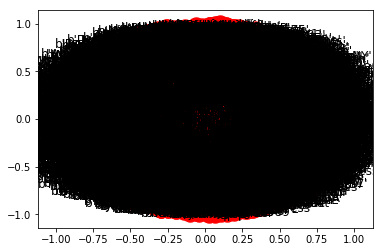

In [56]:
nx.draw_networkx(g)

## Subset Graph

Use core or island methods described in text book to identify communities

## Plot Subsetted Graph

## Analyze Graph

- Graph Diameter
- Avegage centrality measures (betweenness, degree, pagerank)
    - Plot centrality measures?

Then, calculate each of these measures by verified status --> create dataframe

## Conclusions, Discussion

## References

- Data source: [Stanford University Twitter Follower Network, 2010](https://snap.stanford.edu/data/twitter-2010.html)

- Twitter API access code adapted from: [Stack Abuse](https://stackabuse.com/accessing-the-twitter-api-with-python/)

- Stack Overflow:[How to iterate through a nested dictionary](https://stackoverflow.com/questions/43752962/how-to-iterate-through-a-nested-dict/43753431)

- [How to Get a User List Using Twython](https://www.silkstream.net/blog/2014/06/playing-with-followers-with-twython-csv.html)

- [NetworkX Tutorial](https://networkx.github.io/documentation/stable/tutorial.html)